In [281]:
%matplotlib inline
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import collections
from collections import defaultdict
import seaborn as sns
import itertools
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
from sklearn import *

In [82]:
#calculate weight for edges in graph
data = pd.read_csv("new_pvals_adjust_0_1.txt", sep="\t")
data['weight'] = data['n_ab'] / (data['num_a']*data['num_b']/data['n'])
cluster_data = data[['a', 'b', 'weight']]
allcdr = list(set(data['a'].tolist() + data['b'].tolist()))
cluster_data.to_csv("GRAPH_01.txt", sep="\t", index=False)
cluster_data[0:5]

,a,b,weight
0,CASSPGIQETQYF,CASSLDPGGETQYF,1.286103
1,CASSVQGGSYEQYF,CASSLDPGGETQYF,1.685884
2,CASSRGSTDTQYF,CASSLDPGGETQYF,1.195442
3,CAWSVGSGANVLTF,CASSLDPGGETQYF,1.501279
4,CASSLSGRGYTF,CASSLDPGGETQYF,1.443738


In [83]:
#make numeric values fir each cdr_aa
vertexes =  pd.DataFrame(allcdr)
vertexes['num'] = vertexes.index
vertexes.columns = ['a', 'numa']

vertexes2 =  pd.DataFrame(allcdr)
vertexes2['num1'] = vertexes2.index
vertexes2.columns = ['b', 'numb']

a_pd = cluster_data.merge(vertexes, on='a', how='inner')
ab_pd = a_pd.merge(vertexes2, on='b', how='inner')
ab_pd[0:5]
cluster_data_num = ab_pd[['numa', 'numb', 'weight']]

cluster_data_num[0:5]

,numa,numb,weight
0,8816,7584,1.286103
1,5092,7584,1.685884
2,7040,7584,1.195442
3,9243,7584,1.501279
4,1638,7584,1.443738


### SYMM MATRIX 9998*9998 

In [282]:
import scipy.sparse as ss

#make matrix 
def read_data_file_as_coo_matrix(cluster_data_num, wei):
    "Read data file and return sparse matrix in coordinate format."
    rows = cluster_data_num['numa']  # Not a copy, just a reference.
    cols = cluster_data_num['numb']
    if wei == 'custom':
        weight = cluster_data_num['weight']#[1 for x in range(len(cluster_data_num['weight']))]
    #ones = np.ones(len(rows))
    if wei == '1':
        weight = [1 for x in range(len(cluster_data_num['weight']))]
        
    matrix = ss.coo_matrix((weight, (rows, cols))).toarray()
    return matrix

kek = read_data_file_as_coo_matrix(cluster_data_num, 'custom')

#symmetric
def symmetrize(a):
    return a + a.T - np.diag(a.diagonal())

lol = symmetrize(kek)

pd_lol = pd.DataFrame(lol, index = vertexes['a'].tolist())
pd_lol.columns = vertexes['a'].tolist()
pd_lol['cdr'] = pd_lol.index
pd_lol[0:5]

,CASSVRDRGTEAFF,CASSLGQGGEQFF,CASSFRAGQETQYF,CASSESGGGQPQHF,CATGQLNTEAFF,CASSYGPNEQFF,CASSVVGDSYNEQFF,CASSRQGGNEQFF,CASSPGWGQPQHF,CASSSSNEQYF,...,CASSQGWDTQYF,CASSPATYNEQFF,CSARRNNEQFF,CASSGGGGEQFF,CASSPPGANEKLFF,CASTPGGYEQYF,CASSYDRGYGYTF,CASSTTADTQYF,CASSYRGRGYEQYF,cdr
CASSVRDRGTEAFF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CASSVRDRGTEAFF
CASSLGQGGEQFF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CASSLGQGGEQFF
CASSFRAGQETQYF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CASSFRAGQETQYF
CASSESGGGQPQHF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CASSESGGGQPQHF
CATGQLNTEAFF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CATGQLNTEAFF


In [283]:
#pd_lol[(pd_lol['cdr'] == 'CASSPRYNEQFF')]['CASSPGVANYGYTF']
#pd_lol[(pd_lol['cdr'] == 'CASSPGVANYGYTF')]['CASSPRYNEQFF']

### SPECTRAL CLUSTERING

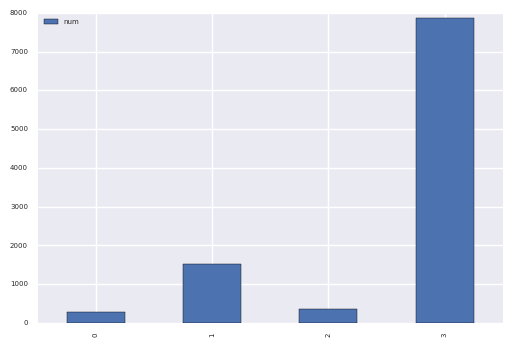

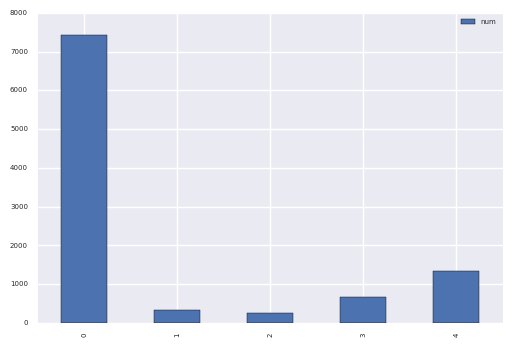

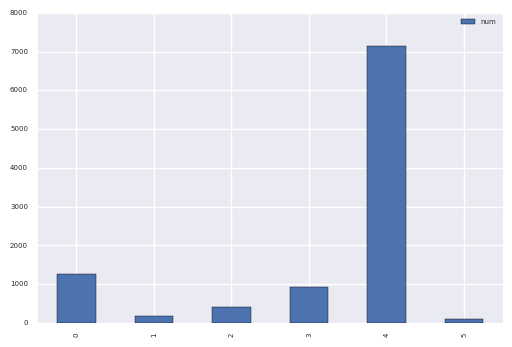

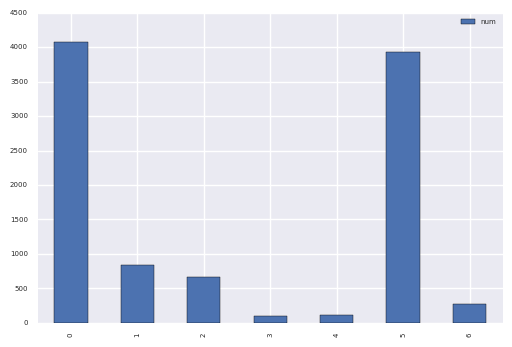

In [284]:
from functools import *     #amg
for el in [4,5, 6, 7]:
    clustering = cluster.SpectralClustering(el, affinity='precomputed',eigen_solver='arpack')
    #clustering.fit(pd_lol.ix[:, 0:-1])
    clusters = clustering.fit_predict(pd_lol.ix[:, 0:-1])
    n = len(set(list(clusters)))
    classes = []
    for k in range(n):
        indices = [i for i, x in enumerate(clusters) if x == k]
        cla = pd.DataFrame(indices)
        cla['class'] = k
        cla.columns = ['num', 'class']
        classes.append(cla)
    kik = reduce(lambda x, y: pd.concat([x, y]), classes)
    kik2 = kik.groupby(['class']).count().reset_index()
    kik2[['num']].plot(kind='bar')

### SELECT 7 CLUSTERS

In [285]:
clustering = cluster.SpectralClustering(7, affinity='precomputed',eigen_solver='arpack')
clusters = clustering.fit_predict(pd_lol.ix[:, 0:-1])

classes=[]
for k in range(7):
    indices = [i for i, x in enumerate(clusters) if x == k]
    cla = pd.DataFrame(indices)
    cla['class'] = k
    cla.columns = ['num', 'class']
    classes.append(cla)
    
kik = reduce(lambda x, y: pd.concat([x, y]), classes)    

vertexes3 =  pd.DataFrame(allcdr)
vertexes3['num'] = vertexes.index
vertexes3.columns = ['cdr', 'num']

vert_class = vertexes3.merge(kik, on='num', how='inner')
vert_class[0:5]

,cdr,num,class
0,CASSVRDRGTEAFF,0,1
1,CASSLGQGGEQFF,1,0
2,CASSFRAGQETQYF,2,1
3,CASSESGGGQPQHF,3,1
4,CATGQLNTEAFF,4,0


In [286]:
from collections import *
d = defaultdict(list)
with open("names.txt", 'r') as f:
    for line in f.readlines():
        name = line.strip()
        with open("public-tcr/D1/"+name, 'r') as g:
            for l in g.readlines():
                cdr = l.strip()
                d[name].append(cdr) 
                
#publics vs samples
d_sample = defaultdict(list)
for k, v in d.items():    
    d_sample[k] = set(v).intersection(allcdr)
    
out = open("PUBLIC_SAMPLE_13_05.txt", 'w')

for k, v in d_sample.items():
    for el in v:
        out.write(k.split(".")[0]+"\t"+el+"\n")
    
    
out.close() 

samp = pd.read_csv("PUBLIC_SAMPLE_13_05.txt", sep="\t", header=None)
samp.columns = ['samp', 'cdr']
samp1 = samp.drop_duplicates()
samp1[0:5]

,samp,cdr
0,HIP01264,CASSLGQGGEQFF
1,HIP01264,CASSLATANTGELFF
2,HIP01264,CASSLENQETQYF
3,HIP01264,CASSQGQVSYEQYF
4,HIP01264,CASSFGQLNEKLFF


In [287]:
#merge samples with clonotypes
merge_ =  vert_class.merge(samp1, on='cdr', how='inner')

#summ clonotypes by sample and cluster
merge_['count'] = 1
new = pd.DataFrame(merge_.groupby(by=['samp', 'class'])['count'].sum()).reset_index()
new1 = new.pivot_table(index=['samp'], columns='class').reset_index()
new1.columns = new1.columns.droplevel()
new1.columns = ['sample', 'claster0', 'claster1', 'claster2', 'claster3', 'claster4', 'claster5', 'claster0']
new2 = new1.set_index('sample')
new2.index.name = None

#normalize by summ clonotypes in column
for el in new2.columns:
    new2[el] = new2[el]/new2[el].sum()
    
new2[0:5]

,claster0,claster1,claster2,claster3,claster4,claster5,claster0
HIP00110,0.000953,0.000842,0.000965,0.000849,0.000479,0.000633,0.001621
HIP00169,0.000746,0.000999,0.000818,0.000830,0.000479,0.000522,0.000778
HIP00594,0.001526,0.001333,0.001460,0.001640,0.000799,0.001088,0.002464
HIP00602,0.001760,0.001427,0.001588,0.001746,0.001491,0.001554,0.001751
HIP00614,0.000919,0.000703,0.000760,0.001090,0.001438,0.001221,0.000519


In [ ]:
#PUBLIC_HLA_SAMPLE.txt

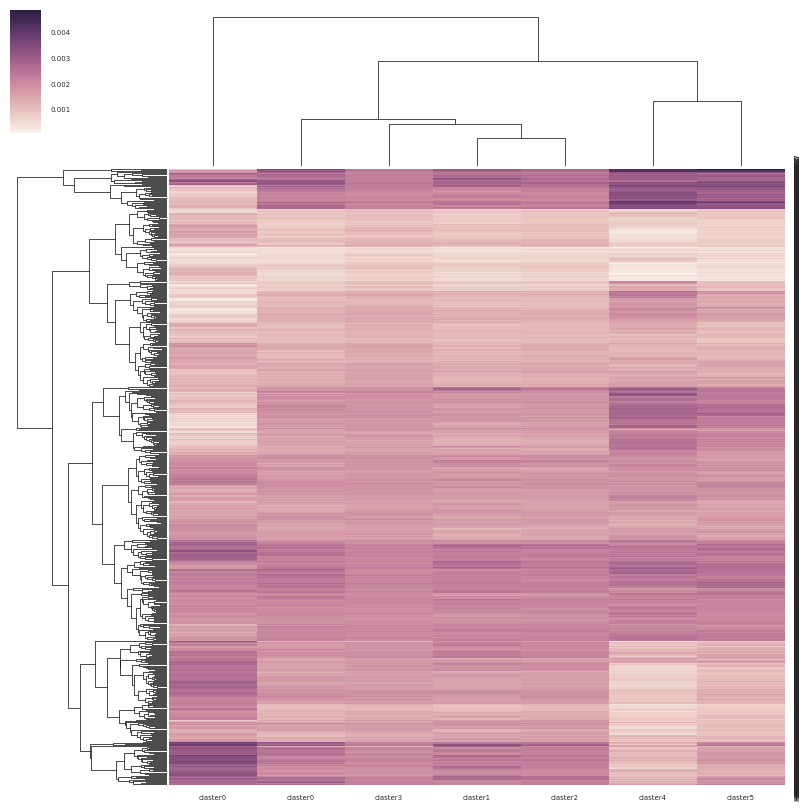

In [288]:
sns.set(font_scale=0.5)
sns.clustermap(new2)